In [20]:
import tensorflow as tf
import numpy as np
import os
import zipfile
from tensorflow import keras

In [21]:
!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

--2021-08-08 12:28:40--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2021-08-08 12:28:40 (152 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [22]:
zip_ref=zipfile.ZipFile('/tmp/happy-or-sad.zip','r')

In [23]:
zip_ref.extractall('/tmp/h-or-s')

In [24]:
zip_ref.close()

In [25]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.999):
      print('\n 99.9% accuracy reached so cancelling the training')
      self.model.stop_training=True

In [26]:
callbacks=MyCallback()

In [27]:
train_happy_dir = os.path.join('/tmp/h-or-s/happy')

train_sad_dir = os.path.join('/tmp/h-or-s/sad')

In [28]:
train_happy_names = os.listdir(train_happy_dir)

In [29]:
train_sad_names=os.listdir(train_sad_dir)

In [30]:
model=tf.keras.Sequential([
                           tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(256,activation='relu'),
                           tf.keras.layers.Dense(1,activation='sigmoid')
])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 78400)            

In [32]:
from keras.optimizers import RMSprop

In [33]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
train_datagen=ImageDataGenerator(rescale=1/255.0)

In [36]:
train_generator=train_datagen.flow_from_directory(
    '/tmp/h-or-s',
    target_size=(300,300),
    batch_size=10,
    class_mode='binary'
)

Found 80 images belonging to 2 classes.


In [37]:
history=model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=20,
    verbose=1,
    callbacks=[callbacks]
)

Epoch 1/20
8/8 [==============================] - 1s 63ms/step - loss: 5.1512 - accuracy: 0.5250
Epoch 2/20
8/8 [==============================] - 0s 53ms/step - loss: 0.4155 - accuracy: 0.7625
Epoch 3/20
8/8 [==============================] - 0s 51ms/step - loss: 0.1100 - accuracy: 0.9500
Epoch 4/20
8/8 [==============================] - 0s 51ms/step - loss: 0.0617 - accuracy: 1.0000

 99.9% accuracy reached so cancelling the training


In [42]:
from google.colab import files
from keras.preprocessing import image

In [53]:
uploaded=files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  img=image.load_img(path,target_size=(300,300))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  classes=model.predict(images,batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is happy")
  else:
    print(fn + " is sad")

Saving smiley-1635448_1280.png to smiley-1635448_1280.png
[1.]
smiley-1635448_1280.png is happy


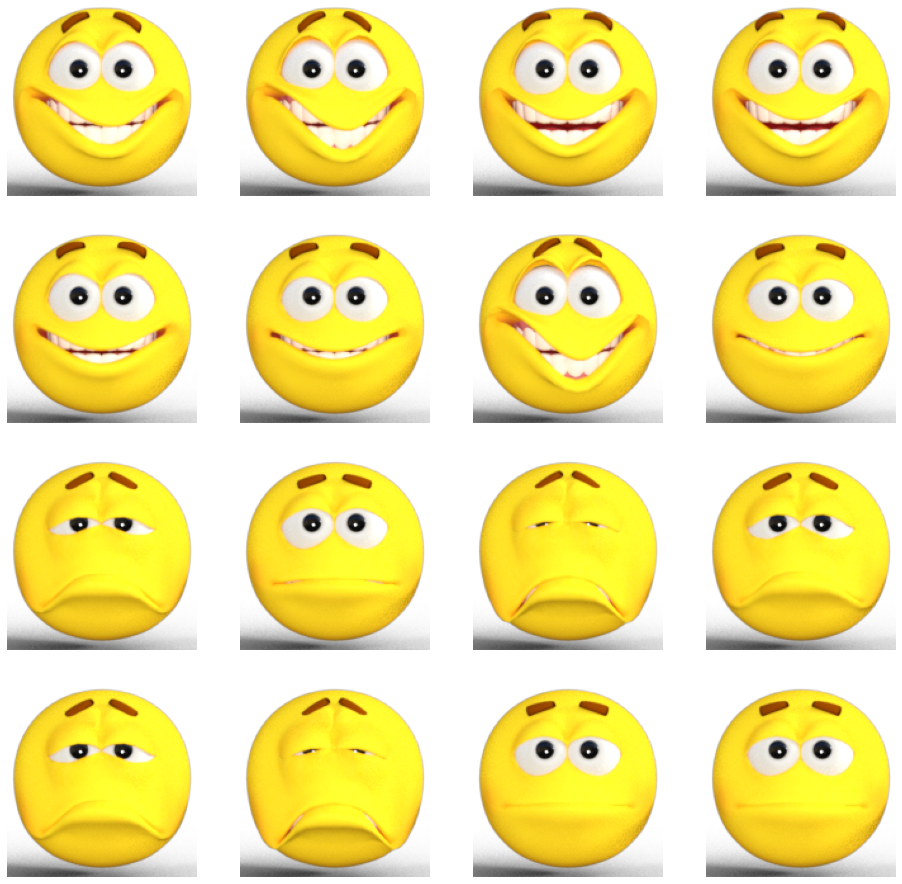

In [51]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_happy_pix = [os.path.join(train_happy_dir, fname) 
                for fname in train_happy_names[pic_index-8:pic_index]]
next_sad_pix = [os.path.join(train_sad_dir, fname) 
                for fname in train_sad_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_happy_pix+next_sad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()